In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset=load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

#Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/alexnadeau/.cache/huggingface/datasets/lukebarousse___data_jobs/default/0.0.0/1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Thu Oct 24 00:43:32 2024).


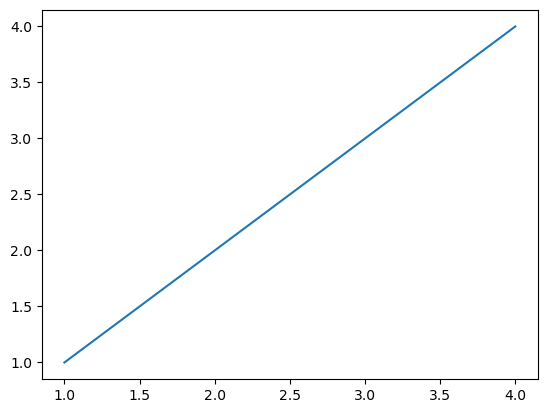

In [3]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)

#to remove weird info above
plt.show()

In [4]:
df.job_posted_date.head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

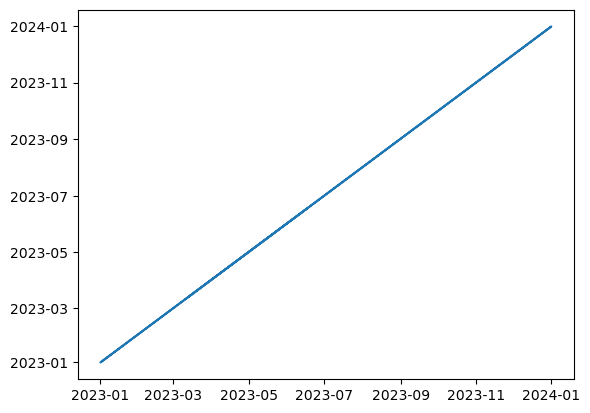

In [5]:
plt.plot(df.job_posted_date, df.job_posted_date)

In [6]:
date_counts = df.job_posted_date.value_counts()

date_counts = date_counts.sort_index()

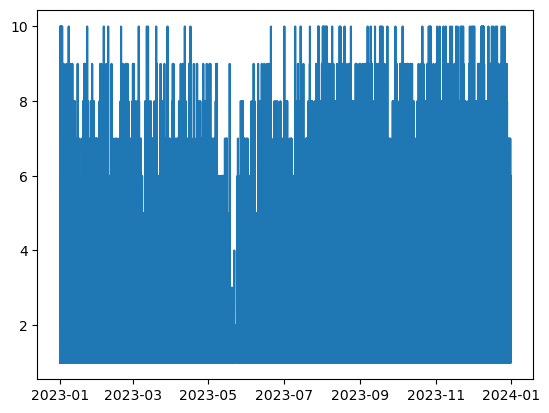

In [7]:
plt.plot(date_counts.index, date_counts)

In [8]:
df["job_posted_month"] = df.job_posted_date.dt.month

monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

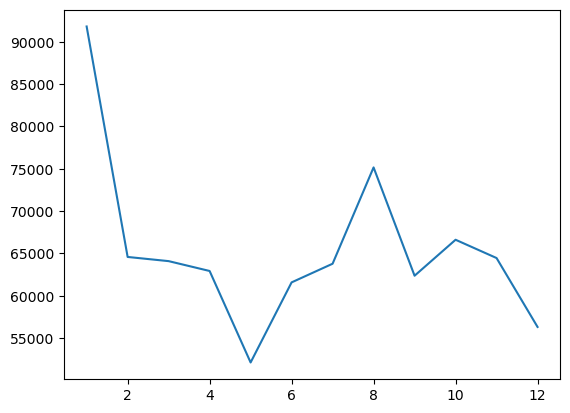

In [9]:


plt.plot(monthly_counts.index, monthly_counts)

In [10]:
#Series vs Dataframe
#column in a dataframe is a series

series = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])

In [11]:
#Bar Charts - Counts of Job Postings
#use iloc to plot certaiin rows
#or use head/tail to call top of table or bottom
job_counts = df.job_title_short.value_counts()

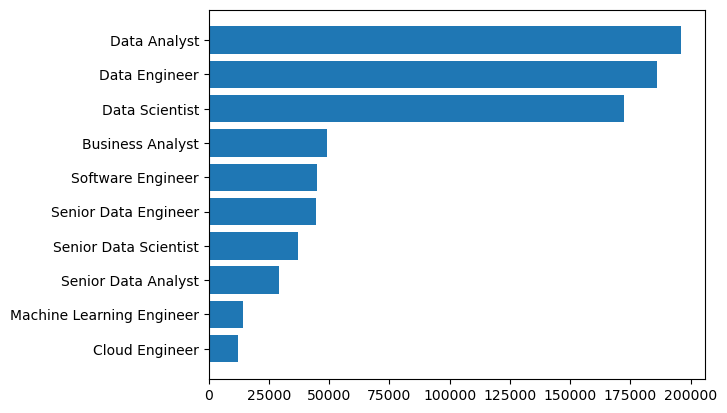

In [12]:
#barh is horizontal and bar is vertical
#to change the order of the chart, use sort_values()

job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index, job_counts)
plt.show()

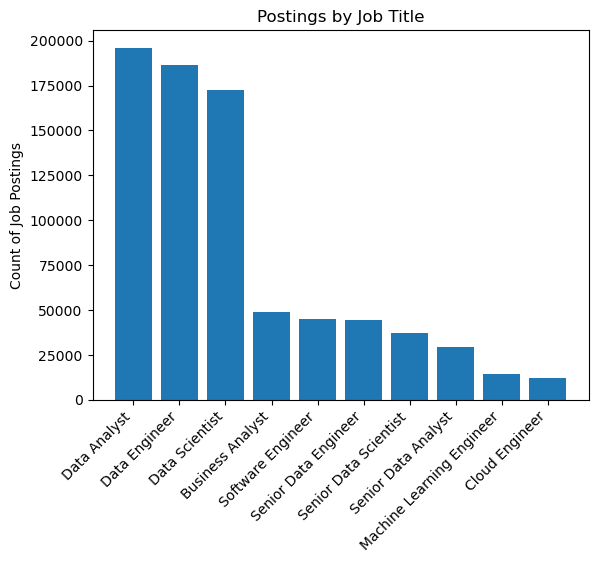

In [13]:
#now lets try and make it vertical again

job_counts = job_counts.sort_values(ascending=False)
plt.bar(job_counts.index, job_counts)
plt.title("Postings by Job Title")
plt.ylabel("Count of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.show()

<BarContainer object of 10 artists>

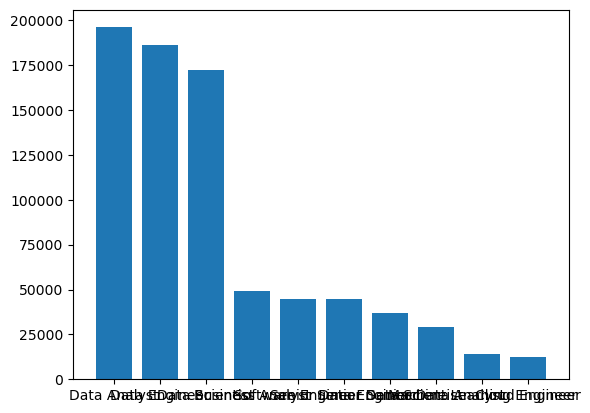

In [14]:
plt.bar(job_counts.index, job_counts)

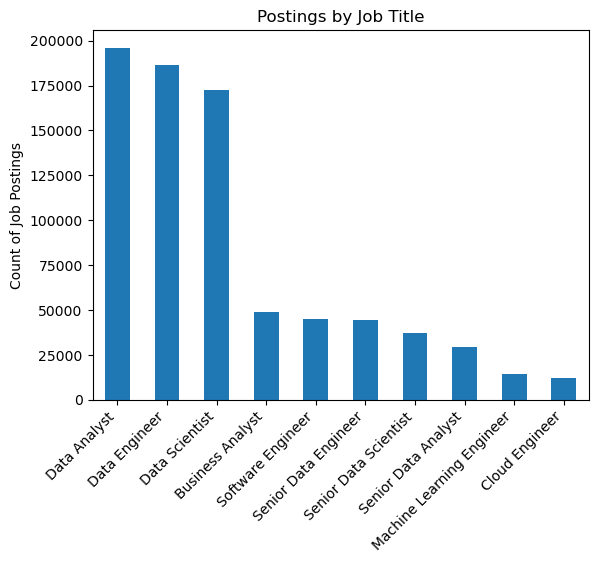

In [15]:
#can use pandas to make a plot and then use matplotlib to edit it like I did above
#this is only with a SERIES, not a dataframe

job_counts.plot(kind="bar")
plt.title("Postings by Job Title")
plt.xlabel("")
plt.ylabel("Count of Job Postings")
plt.xticks(rotation=45, ha="right")
plt.show()

<Axes: xlabel='job_posted_date'>

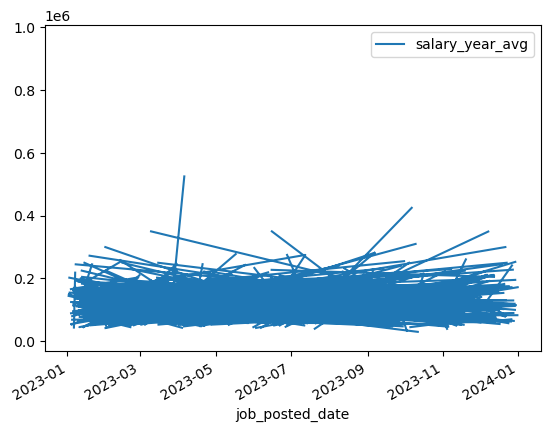

In [21]:
#now here is how we plot using a dataframe
#let's plot over time using a line chart how the salary is trending over the year in 2023

#creates a new dataframe with two specific columns and then removes any rows where the salary information is missing, keeping only the rows with valid salary data
df[["job_posted_date", "salary_year_avg"]].dropna(subset=['salary_year_avg'])
df.plot(x="job_posted_date", y="salary_year_avg", kind="line")

In [17]:
job_salary = df.groupby("job_title_short")["salary_year_avg"].median().sort_values()
job_salary

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Software Engineer             99150.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Data Engineer                125000.0
Data Scientist               127500.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Name: salary_year_avg, dtype: float64

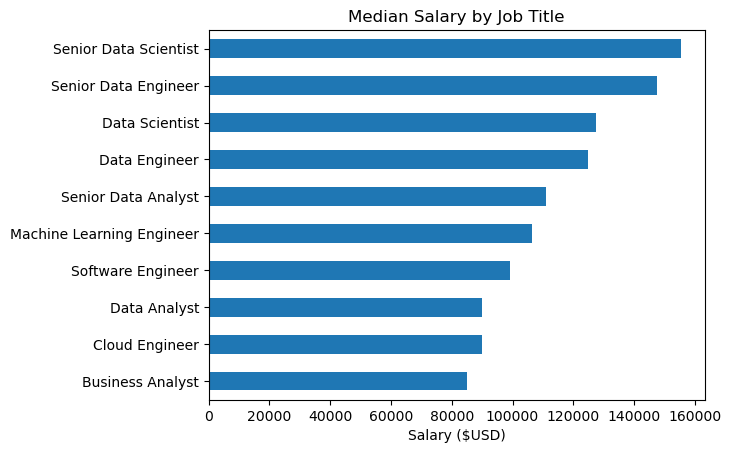

In [18]:
job_salary.plot(kind="barh")
plt.xlabel("Salary ($USD)")
plt.title("Median Salary by Job Title")
plt.ylabel("")
plt.show()